This notebook tests the algorithm by predicting whether a breast tumor is malignant or benign.
The dataset used is: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('wdbc.csv', header=None)
df = df.rename(columns={0:'ID', 1 : 'Diagnosis'})

In [3]:
df['Diagnosis'] = df['Diagnosis'].replace('M', 1)
df['Diagnosis'] = df['Diagnosis'].replace('B', 0)
df.head()

C:\Users\AHMAD AZMI\AppData\Local\Temp\ipykernel_16796\4020969065.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Diagnosis'] = df['Diagnosis'].replace('B', 0)


,ID,Diagnosis,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
from sklearn.model_selection import train_test_split
import random
import logistic__regression as logistic__regression

points = df.iloc[:, 2:]
targets = df.iloc[:, 1]
points = points.apply(lambda x : (x - x.mean())/x.std())
points = points.to_numpy()

vec_train, vec_test, diag_train, diag_test = train_test_split(points, targets, train_size=0.3, random_state=42)
learning_rate = 0.01
LRC = logistic__regression.LRClassifier()

beta = [ random.random() for _ in range(30) ]

beta = LRC.predict_beta(vec_train, diag_train)


In [8]:
true_p, false_p, true_n, false_n = 0,0,0,0
predictions = []

for x_i, y_i in zip(vec_test, diag_test):
    prediction = LRC.predict(x_i, beta=beta)

    if prediction > 0.5 and y_i == 1: #True Positive
        true_p += 1
    elif prediction > 0.5 and y_i == 0: #False Positive
        false_p += 1
    elif prediction < 0.5 and y_i == 0: #True Negative
        true_n += 1
    else: #False Negative
        false_n += 1

    if prediction > 0.5:
        predictions.append(1)
    else:
        predictions.append(0)

percision = true_p/(true_p+false_p)
recall = true_p/(true_p + false_n)

print(f"P:{percision} , R:{recall}")

P:0.912751677852349 , R:0.9714285714285714


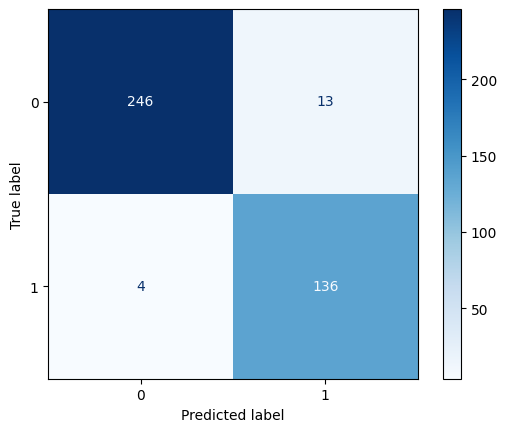

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(diag_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot(cmap='Blues')